In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Uber Request Data.csv')

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [5]:
# checking if request id is unique or not

In [6]:
len(df['Request id'])==df.shape[0]

True

In [7]:
# checking for null values

In [8]:
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [9]:
# percentage of NULL values

In [10]:
df.isna().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [11]:
# cnverting request timestamp colums to date time format

In [12]:
df['Request timestamp']=df['Request timestamp'].astype(str)

In [13]:
df['Request timestamp']=df['Request timestamp'].str.replace('/','-')

In [14]:
df["Request timestamp"]=pd.to_datetime(df['Request timestamp'],dayfirst=True)

In [15]:
df['Request timestamp']

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [16]:
df['Drop timestamp']=df['Drop timestamp'].astype(str)

In [17]:
df['Drop timestamp']=df['Drop timestamp'].str.replace('/','-')
df["Drop timestamp"]=pd.to_datetime(df['Drop timestamp'],dayfirst=True)
df['Drop timestamp']

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [19]:
# Fetching the request hours

In [20]:
request_hours=df['Request timestamp'].dt.hour

In [21]:
request_hours

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [22]:
df['Request_hours']=request_hours

In [23]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hours
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [24]:
df['Request_day']=df['Request timestamp'].dt.day

In [25]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hours,Request_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


### Counts of the requests in each hours of the day and in respect of their status 

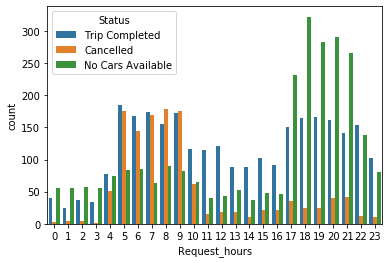

In [26]:
sns.countplot(x='Request_hours',data=df,hue='Status')
plt.show()

### Counts of the reuests on each days

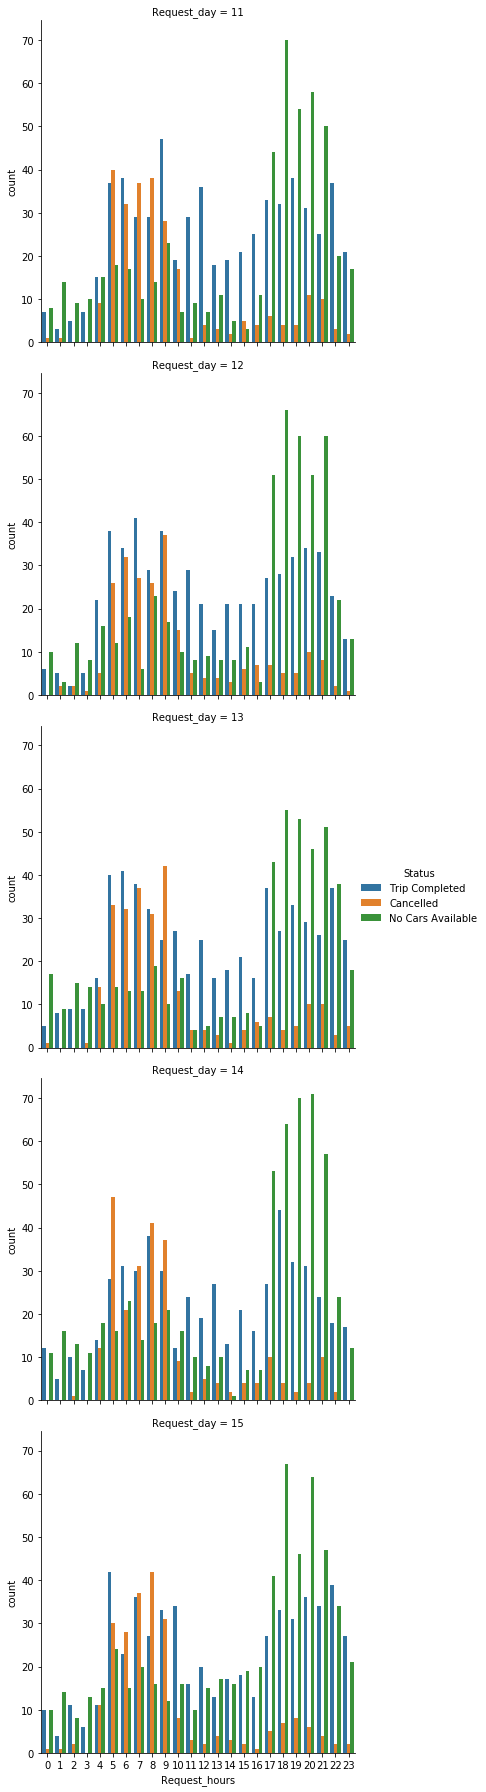

In [27]:
sns.catplot(x='Request_hours',data=df,kind='count',row='Request_day',hue="Status")
plt.show()

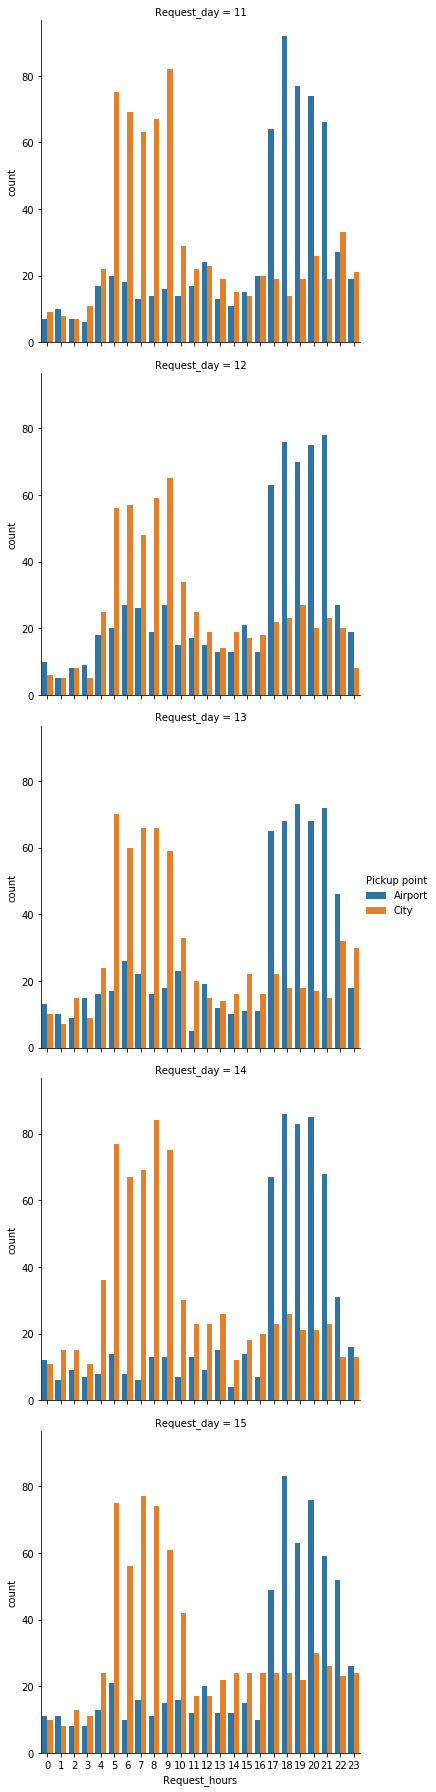

In [28]:
sns.catplot(x='Request_hours',data=df,hue='Pickup point',kind='count',row='Request_day')

In [29]:
# now for all days

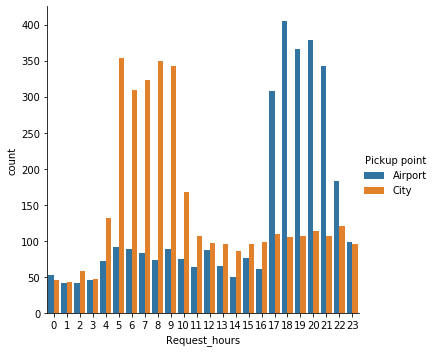

In [30]:
sns.catplot(x='Request_hours',data=df,hue='Pickup point',kind='count')
plt.show()

In [31]:
# making colums that have time slots like pre morning(<5), morning rush(5-10),daytime(10-17),evening rush(17-22),latenight

In [32]:
df['Time_slot']=0

In [33]:
for i in range(df.shape[0]):
    if df.loc[i,'Request_hours']<5:
        df.loc[i,'Time_slot']='Pre_morning'
    elif df.loc[i,'Request_hours']>=5 and df.loc[i,'Request_hours']<=10:
        df.loc[i,'Time_slot']='Morning_rush'
    elif df.loc[i,'Request_hours']>=11 and df.loc[i,'Request_hours']<=17:
        df.loc[i,'Time_slot']='Day_time'
    elif df.loc[i,'Request_hours']>=18 and df.loc[i,'Request_hours']<22:
        df.loc[i,'Time_slot']='Evening_rush'
    else:
        df.loc[i,'Time_slot']='Late_night'

In [34]:
df['Time_slot'].value_counts()

Morning_rush    2346
Evening_rush    1924
Day_time        1399
Pre_morning      578
Late_night       498
Name: Time_slot, dtype: int64

### Count of status of request in different Time slots in a day 

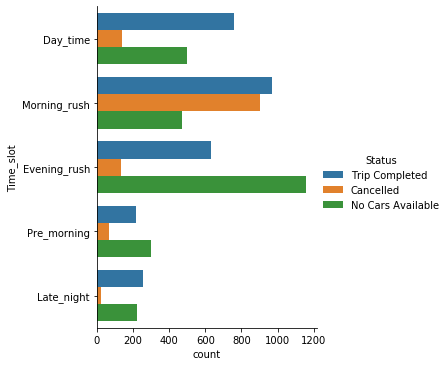

In [35]:
sns.catplot(data=df,y='Time_slot',kind='count',hue='Status')
plt.show()

In [36]:
df_morning=df[df['Time_slot']=='Morning_rush']

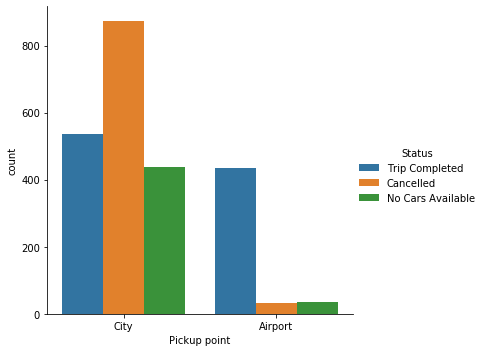

In [37]:
sns.catplot(data=df_morning,x='Pickup point',hue='Status',kind='count')
plt.show()

## Severity of problem by location and their count ( cancellation of cab as per the pickup location at morning rush hours)

In [38]:
df_airport_cancelled_morning=df_morning[np.logical_and(df_morning['Pickup point']=='Airport',df_morning['Status']=='Cancelled')]

In [40]:
df_airport_cancelled_morning.shape[0]

32

In [41]:
df_city_cancelled_morning=df_morning[np.logical_and(df_morning['Pickup point']=='City',df_morning['Status']=='Cancelled')]

In [42]:
df_city_cancelled_morning.shape[0]

873

## Demand and Supply in Morning rush hours in City

In [43]:
print("Demand in Morining rush hours in City is",df_morning[df_morning['Pickup point']=='City'].shape[0])

Demand in Morining rush hours in City is 1845


In [44]:
print("Supply in Morining rush hours in City is",df_morning[np.logical_and(df_morning['Pickup point']=='City',df_morning['Status']=='Trip Completed')].shape[0])

Supply in Morining rush hours in City is 535


## Demand and Supply in Morning rush hours in Airport

In [45]:
print("Demand in Morining rush hours in Airport is",df_morning[df_morning['Pickup point']=='Airport'].shape[0])

Demand in Morining rush hours in Airport is 501


In [46]:
print("Supply in Morining rush hours in Airport is",df_morning[np.logical_and(df_morning['Pickup point']=='Airport',df_morning['Status']=='Trip Completed')].shape[0])

Supply in Morining rush hours in Airport is 435


# For Evening Rush

In [47]:
df_evening=df[df['Time_slot']=='Evening_rush']

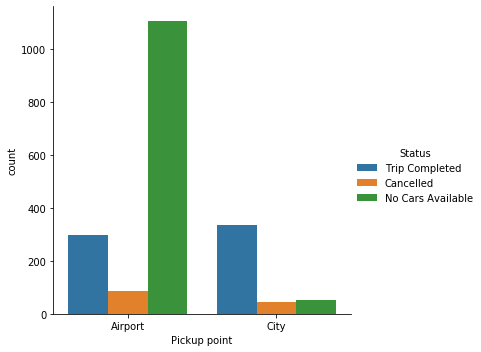

In [48]:
sns.catplot(data=df_evening,x='Pickup point',hue='Status',kind='count')
plt.show()

## Severity of problem by location and their count ( cancellation of cab as per the pickup location at evening rush hours)

In [49]:
df_airport_cancelled_evening=df_evening[np.logical_and(df_evening['Pickup point']=='Airport',df_evening['Status']=='Cancelled')]

In [50]:
df_airport_cancelled_evening.shape[0]

87

In [51]:
df_city_cancelled_evening=df_evening[np.logical_and(df_evening['Pickup point']=='City',df_evening['Status']=='Cancelled')]

In [52]:
df_city_cancelled_evening.shape[0]

44

## Demand and Supply in Evening rush hours in Airport

In [53]:
print("Demand in Evening rush hours in Airport is",df_evening[df_evening['Pickup point']=='Airport'].shape[0])

Demand in Evening rush hours in Airport is 1492


In [55]:
print("Supply in Evening rush hours in Airport is",df_evening[np.logical_and(df_evening['Pickup point']=='Airport',df_evening['Status']=='Trip Completed')].shape[0])

Supply in Evening rush hours in Airport is 299


## Demand and Supply in Evening rush hours in City

In [56]:
print("Demand in Evening rush hours in City is",df_evening[df_evening['Pickup point']=='City'].shape[0])

Demand in Evening rush hours in City is 432


In [57]:
print("Supply in Evening rush hours in City is",df_evening[np.logical_and(df_evening['Pickup point']=='City',df_evening['Status']=='Trip Completed')].shape[0])

Supply in Evening rush hours in City is 334


## Severity at ecah location by looking at cancellation of cabs in each pick up location

In [58]:
df_evening[np.logical_and(df_evening['Pickup point']=='City',df_evening['Status']=='Cancelled')].shape[0]

44

In [59]:
df_evening[np.logical_and(df_evening['Pickup point']=='Airport',df_evening['Status']=='Cancelled')].shape[0]

87

## Pie chart

In [89]:
df_morning_city=df_morning[df['Pickup point']=='City']

C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [90]:
df_morning_city_counts=pd.DataFrame(df_morning_city['Status'].value_counts())

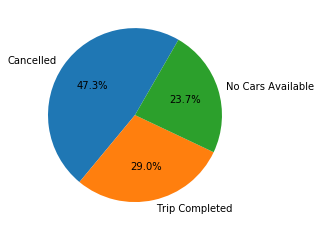

In [91]:
fig,ax=plt.subplots()
ax.pie(df_morning_city_counts['Status'],labels=df_morning_city_counts.index,autopct='%.1f%%',startangle=60)
plt.show()

In [92]:
df_evening_airport=df_evening[df['Pickup point']=='Airport']

C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [93]:
df_evening_airport_counts=pd.DataFrame(df_evening_airport['Status'].value_counts())

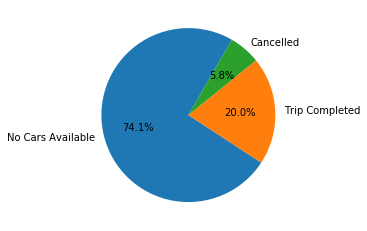

In [94]:
fig,ax=plt.subplots()
ax.pie(df_evening_airport_counts['Status'],labels=df_evening_airport_counts.index,autopct='%.1f%%',startangle=60)
plt.show()

# Recommendations

1. They could be given a bonus for each trip they complete from the city to the Airport in the morning rush time. This will ensure that less number of trips are cancelled

2. Uber can pay for the gas mileage for the drivers to come back without a ride

3. Drivers can again be given bonus to complete a trip from the Airport in the evening. This will ensure the supply increases at the airport

4. Uber can also pay drivers to come without a passenger to the airport

5. To increses liscences of car pooling taxi's. So, that lesser number ofcars can server more passengers